<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORT-PACKAGES" data-toc-modified-id="IMPORT-PACKAGES-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORT PACKAGES</a></span><ul class="toc-item"><li><span><a href="#Import-customize-functions-for-fitting-data" data-toc-modified-id="Import-customize-functions-for-fitting-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import customize functions for fitting data</a></span></li><li><span><a href="#Python-library-for-colourblind" data-toc-modified-id="Python-library-for-colourblind-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Python library for colourblind</a></span></li></ul></li><li><span><a href="#LOAD-DATA" data-toc-modified-id="LOAD-DATA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LOAD DATA</a></span></li><li><span><a href="#DATA-VISUALIZATION" data-toc-modified-id="DATA-VISUALIZATION-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DATA VISUALIZATION</a></span><ul class="toc-item"><li><span><a href="#Amplification-curve-visualization" data-toc-modified-id="Amplification-curve-visualization-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Amplification curve visualization</a></span></li><li><span><a href="#Melting-curve-visualization" data-toc-modified-id="Melting-curve-visualization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Melting curve visualization</a></span></li><li><span><a href="#Melting-peaks-distribution-plot" data-toc-modified-id="Melting-peaks-distribution-plot-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Melting peaks distribution plot</a></span></li><li><span><a href="#Final-Fluorescence-intensity-analysis-visualization" data-toc-modified-id="Final-Fluorescence-intensity-analysis-visualization-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Final Fluorescence intensity analysis visualization</a></span></li></ul></li></ul></div>

# IMPORT PACKAGES

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from tqdm.auto import tqdm
import time
from datetime import datetime

## Import customize functions for fitting data

In [6]:
import python_libraries.fitting_func as fitfunc
import python_libraries.peak_finder as peakfunc
import python_libraries.plotting_func as plotfunc
import python_libraries.utilities as utils

## Python library for colourblind
need to be integrated into python library.

In [7]:
import matplotlib as mpl
from cycler import cycler
from matplotlib.colors import to_hex
mpl.rcParams['axes.prop_cycle'] = cycler(color=[to_hex(i) for i in
                                                [(0,0.45,0.70),
                                                (0.9, 0.6, 0.0),
                                                (0.0, 0.60, 0.50),
                                                (0.8, 0.4, 0),
                                                (0.35, 0.7, 0.9),
                                                (0.8, 0.6, 0.7),
                                                (0,0,0),
                                                (0.5, 0.5, 0.5),
                                                (0.286, 0, 0.573)]])

# LOAD DATA

In [9]:
df_dAC_raw = pd.read_csv("dataframe_saved/00_df_raw_AC.csv", header=0, index_col=0, low_memory=False)
df_dMC_raw = pd.read_csv("dataframe_saved/00_df_raw_MC.csv", header=0, index_col=0, low_memory=False)
df_dAC_filt_bs = pd.read_csv('dataframe_saved/01_df_AC_filt_bs.csv', header=0, index_col=0, low_memory=False)
df_dAC_filt_norm = pd.read_csv('dataframe_saved/01_df_AC_filt_norm.csv', header=0, index_col=0, low_memory=False)
df_dMC_filt = pd.read_csv('dataframe_saved/01_df_MC_filt.csv', header=0, index_col=0, low_memory=False)
df_master = pd.read_csv('dataframe_saved/01_df_master_filt.csv', header=0, index_col=0, low_memory=False)

In [10]:
NMETA = 6 # number of meta columns (use for skipping)
PM = "5plex_A"

# setting column index as int (after reading csv)]
df_AC_raw = utils.order_columns(df_dAC_raw, NMETA=NMETA)
df_MC_raw = utils.order_columns(df_dMC_raw, NMETA=NMETA)
df_ampl = utils.order_columns(df_dAC_filt_bs, NMETA=NMETA)
df_ampl_norm = utils.order_columns(df_dAC_filt_norm, NMETA=NMETA)
df_melt_curve = utils.order_columns(df_dMC_filt, NMETA=NMETA)
df_master = utils.order_columns(df_master, NMETA=NMETA+1)

In [11]:
df_master_no_ntc = df_master[df_master.Target!='ntc']

# DATA VISUALIZATION

## Amplification curve visualization

In [12]:
# df_plot_AC = df_ampl_norm.loc[df_ampl_norm.Exp_id=='20210209_01']
df_plot_AC = df_ampl.copy()
# df_plot_AC = df_plot_AC.loc[df_plot_AC.Conc == 10000000]

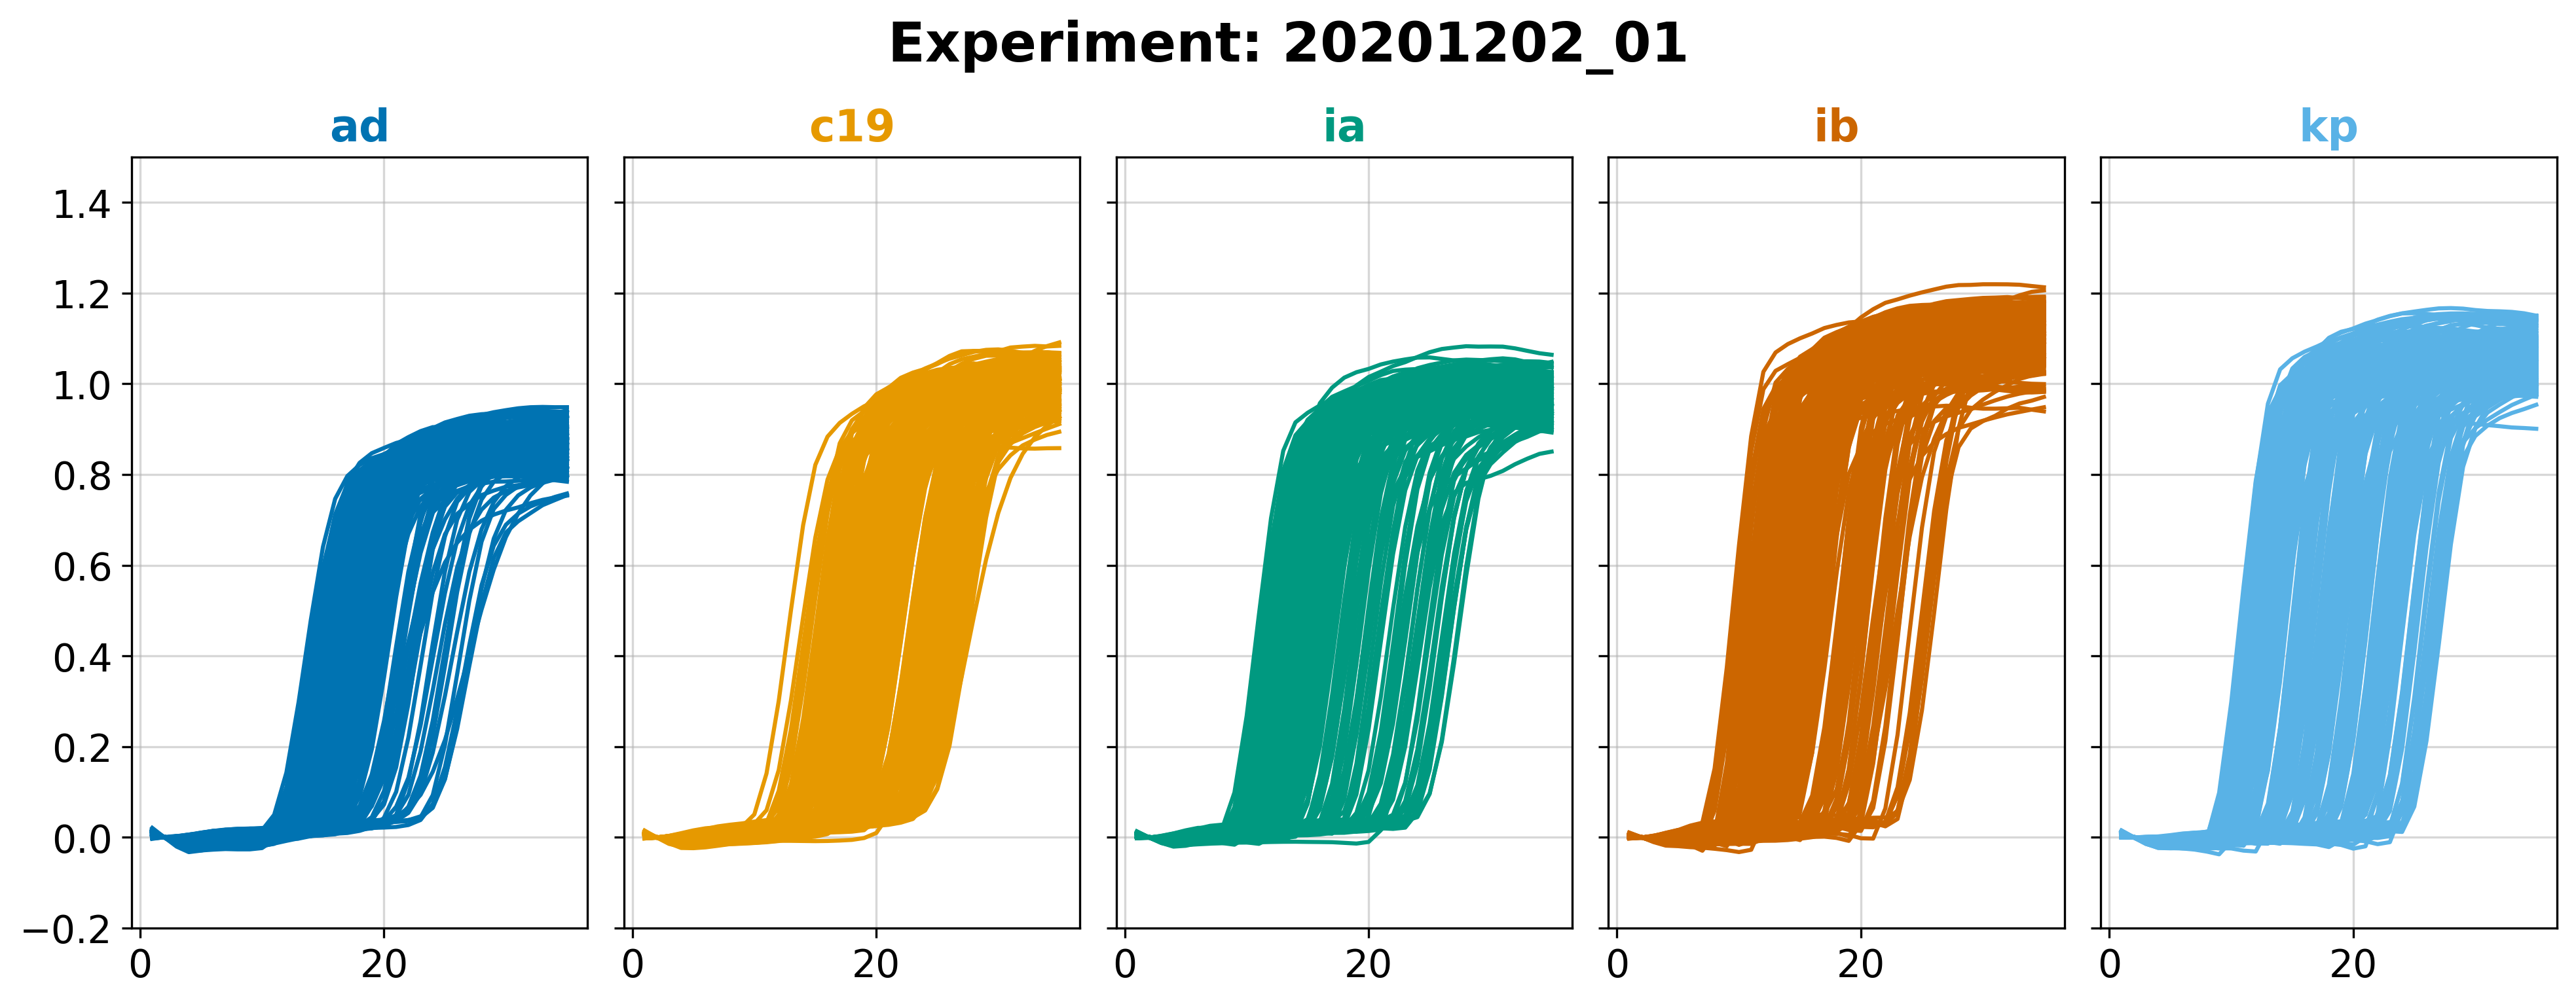

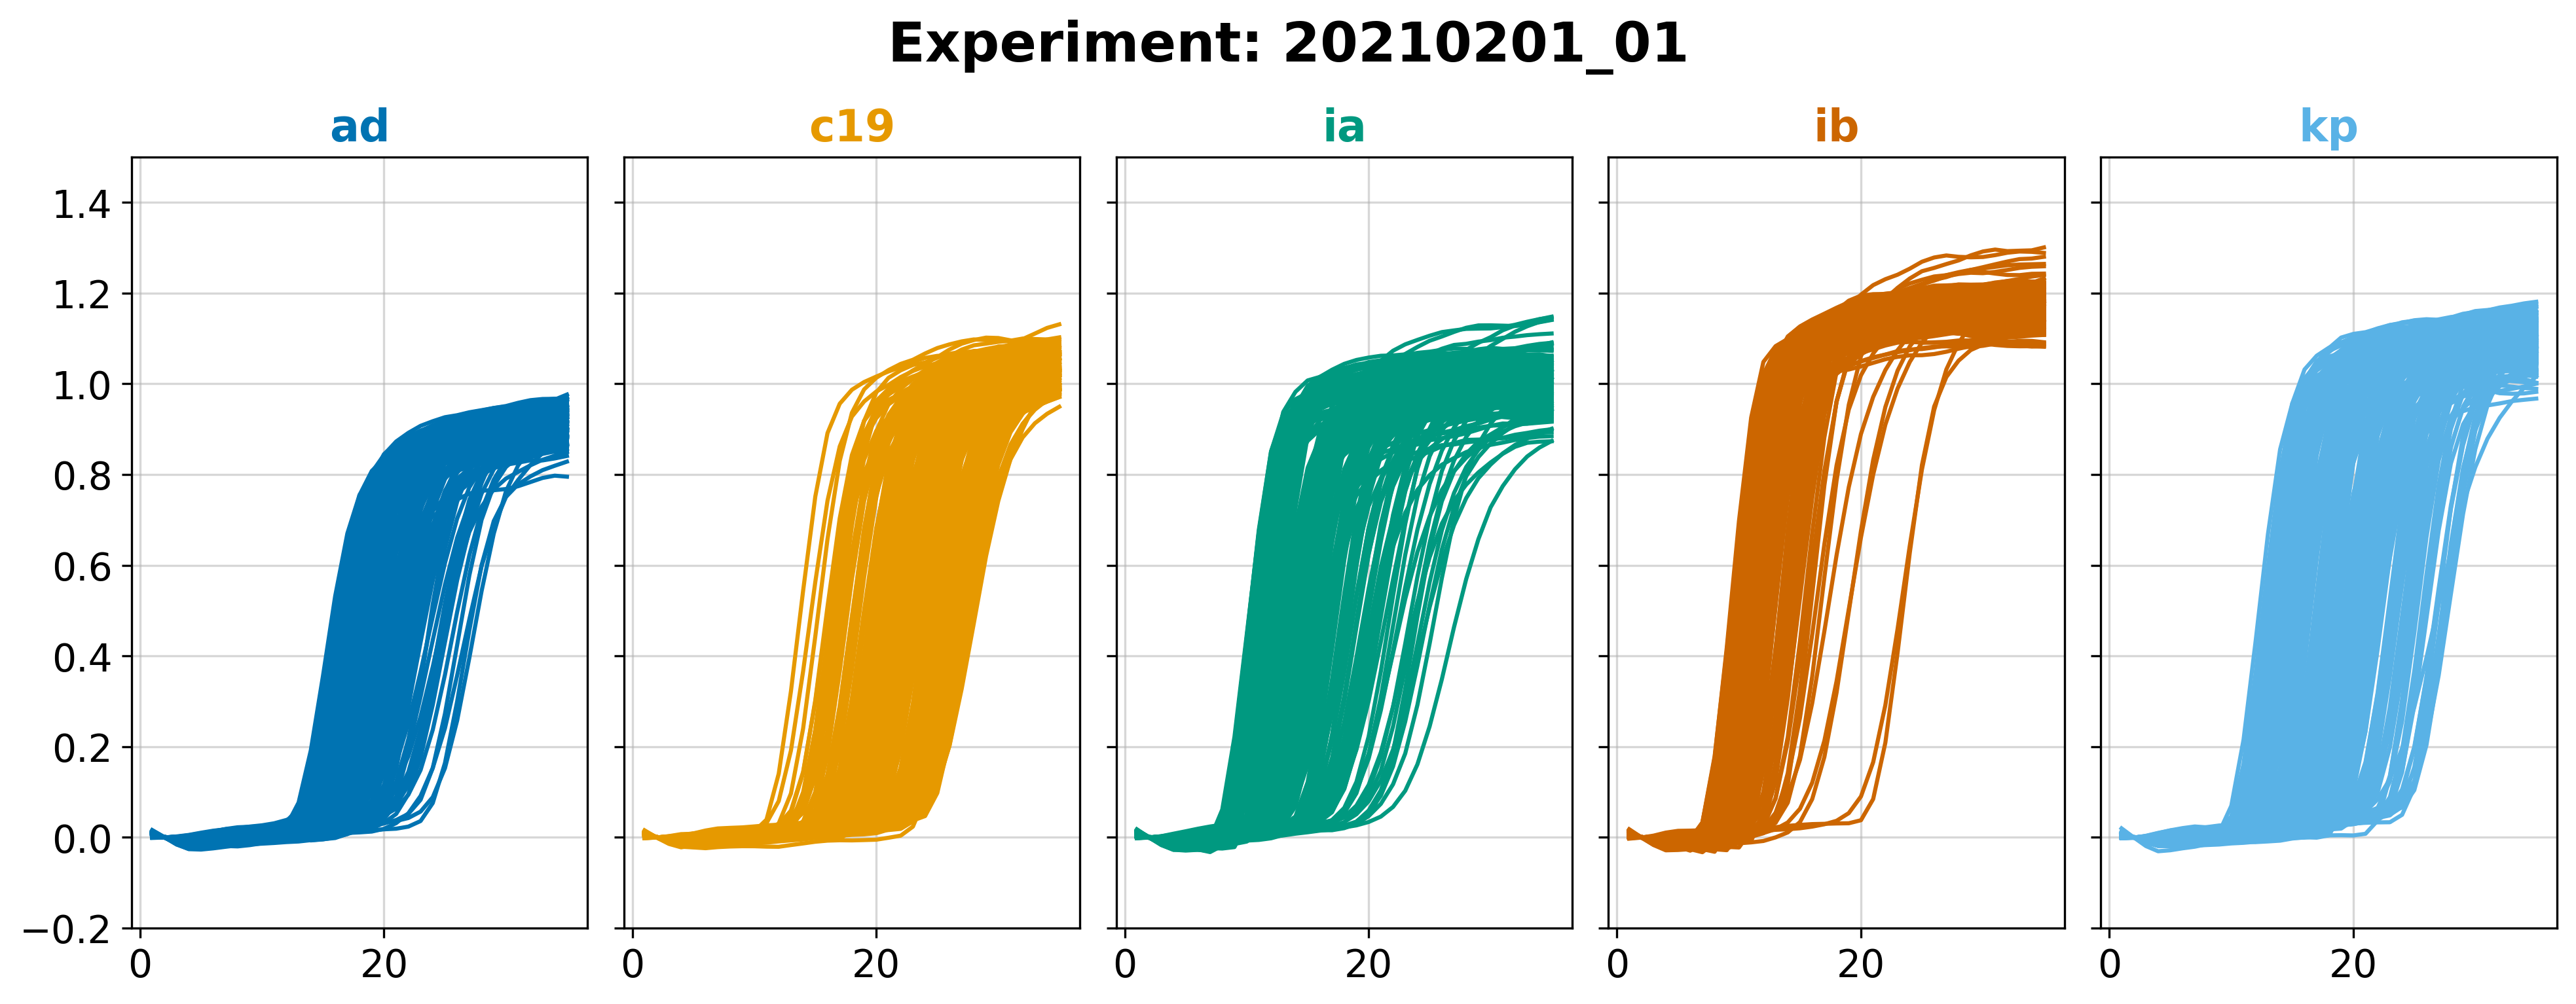

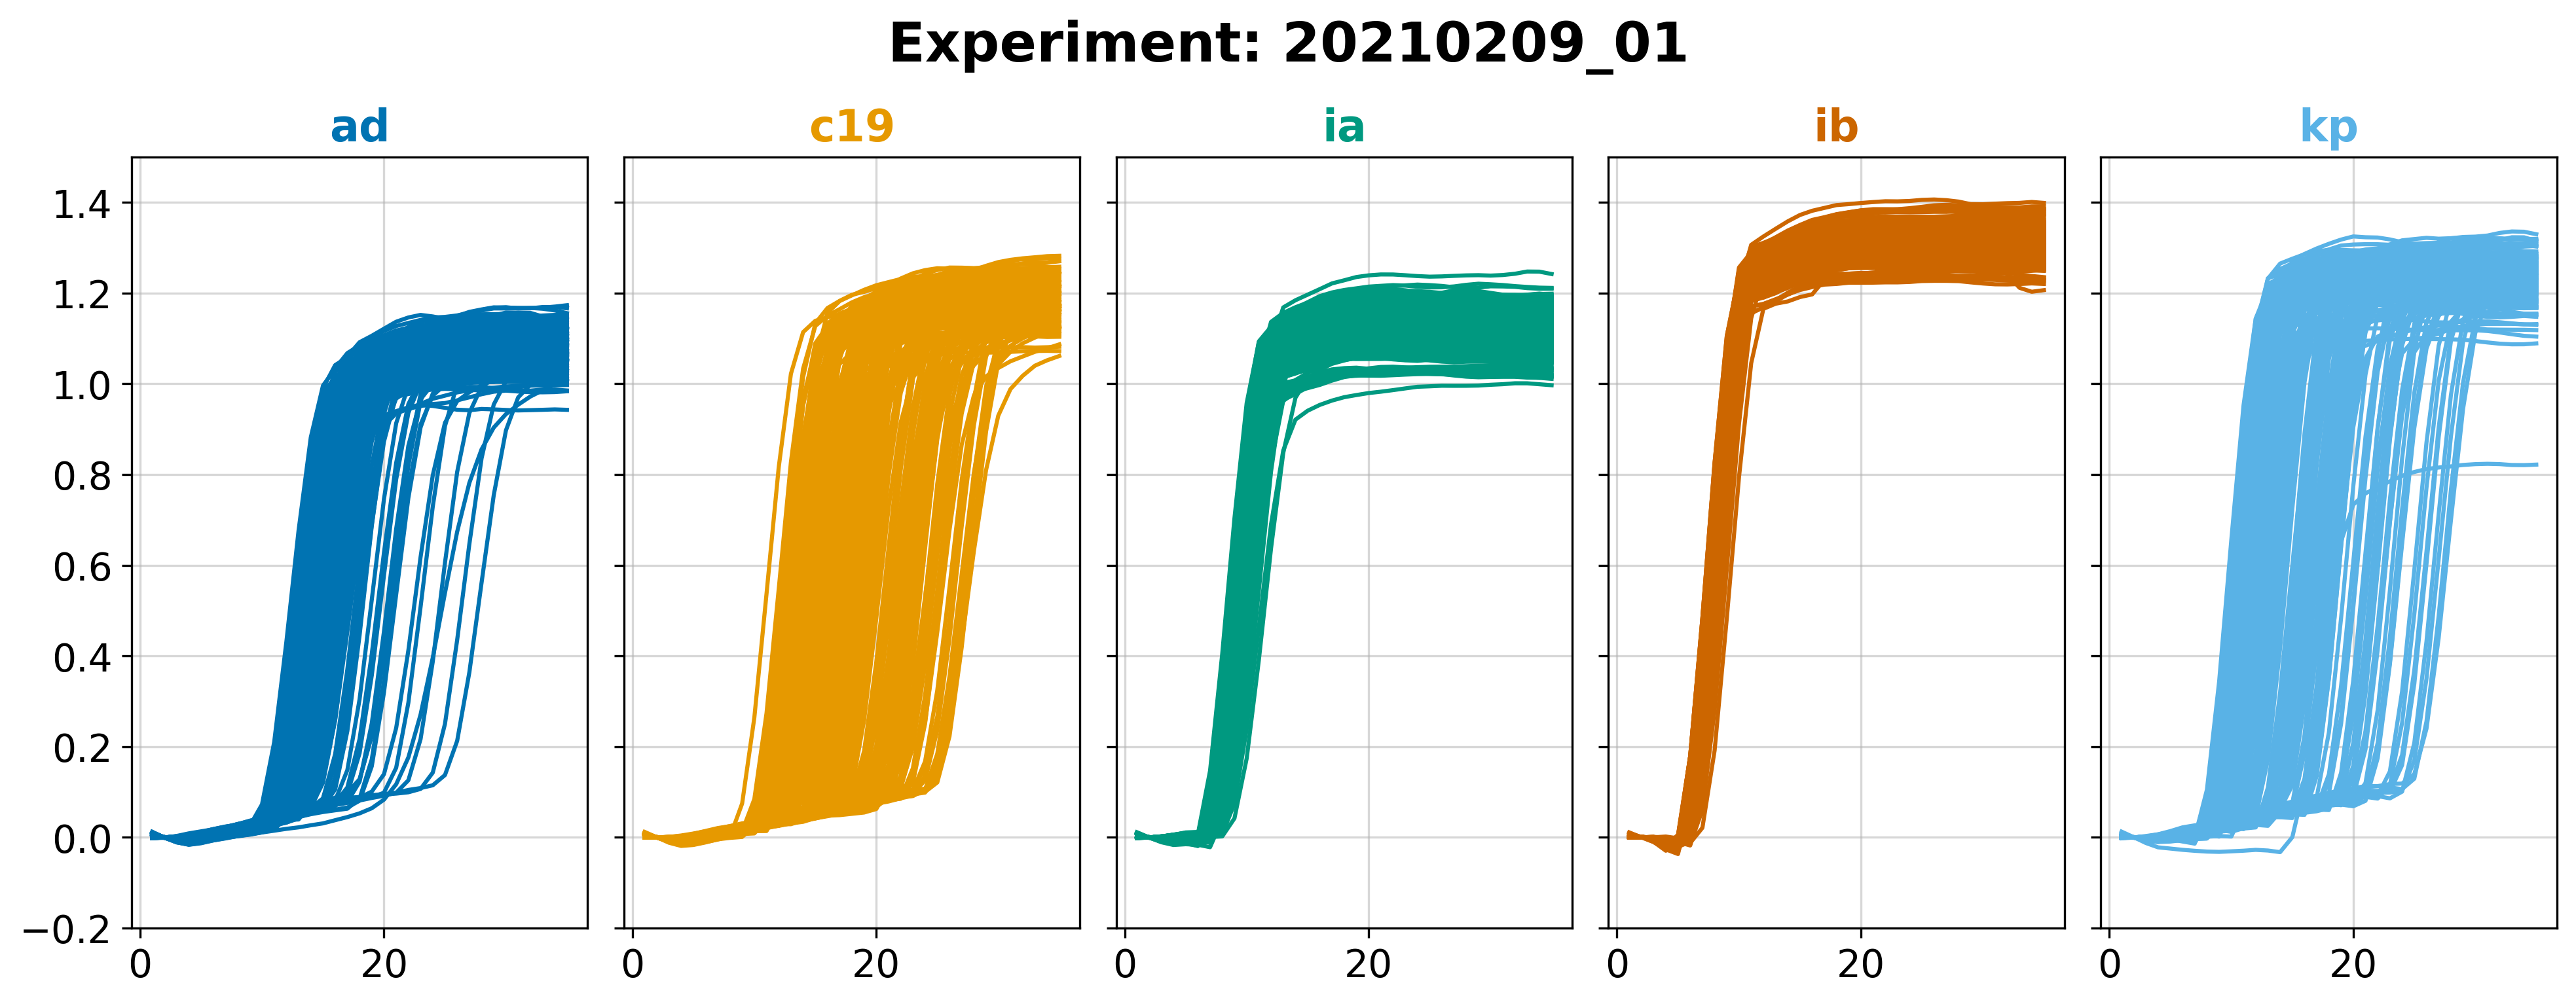

In [9]:
for exp_id, df in df_plot_AC.groupby('Exp_id'):

    fig, ax = plt.subplots(1, 5, figsize=(13, 5), dpi=300, constrained_layout=True)
    ax = ax.flatten()
    fig.suptitle(f"Experiment: {exp_id}", fontsize=20, weight='bold')
    
    for i, (target, df_) in enumerate(tqdm(df.groupby('Target'))):
        ax[i].set_title(f"{target}", fontsize=16, weight='bold', c=f"C{i}")
        curves = df_.iloc[:, NMETA:].sample(200).transpose()

        ax[i].plot(curves.index, curves.values, c=f"C{i}")
        ax[i].grid(alpha=0.5)
        ax[i].set_ylim((-0.2, 1.5))

        ax[i].tick_params(axis='x', labelsize=14)
        ax[i].tick_params(axis='y', labelsize=14) 

        if i>0:
            ax[i].set_yticklabels([])

    plt.show()

## Melting curve visualization

In [13]:
df_plot_MC = df_melt_curve.loc[df_melt_curve.Exp_id=='20210209_01']
# df_plot_MC = df_plot_MC.loc[df_plot_MC.Conc==10000000]

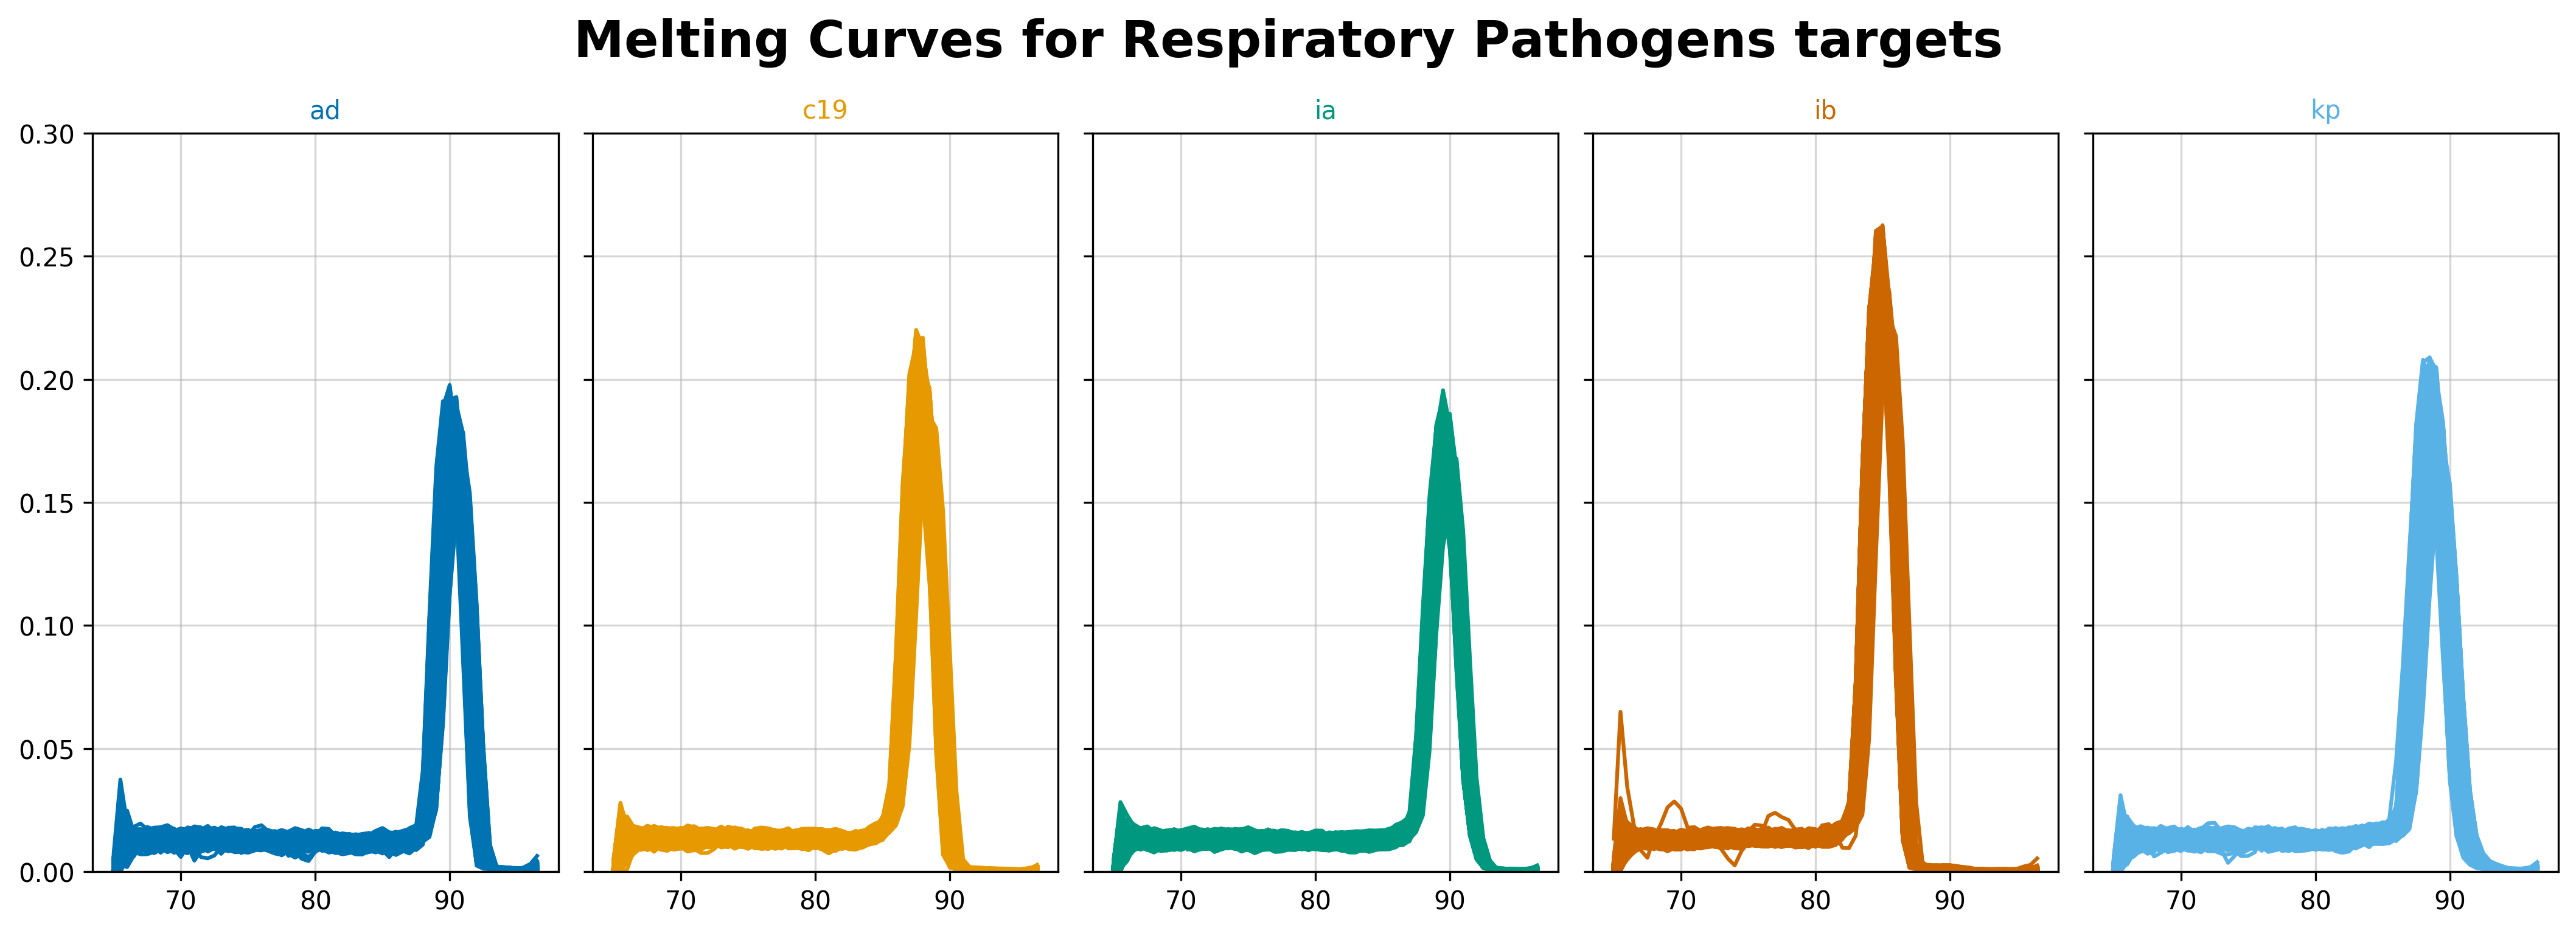

In [20]:
fig, ax = plt.subplots(1, 5, figsize=(14, 5), dpi=300, constrained_layout=True)
fig.suptitle("Melting Curves for Respiratory Pathogens targets", fontsize=20, weight="bold")
ax = ax.flatten()

for i, (target, df) in enumerate(df_plot_MC.groupby('Target')):
    ax[i].set_title(f"{target}", c=f"C{i}", fontsize=10)
    curves = df.iloc[:, NMETA:].transpose()
    curves = curves.sample(2000, axis=1)
    
    ax[i].plot( curves.index, curves.values, c=f"C{i}")
    ax[i].grid(alpha=0.5)
    ax[i].set_ylim((0, 0.3))
    
    if i>0:
        ax[i].set_yticklabels([])

plt.show()

## Melting peaks distribution plot

In [23]:
df_plot_MC_dist = df_master_no_ntc.loc[df_master_no_ntc.Exp_id=='20210209_01']
df_plot_MC_dist = df_master_no_ntc.copy()

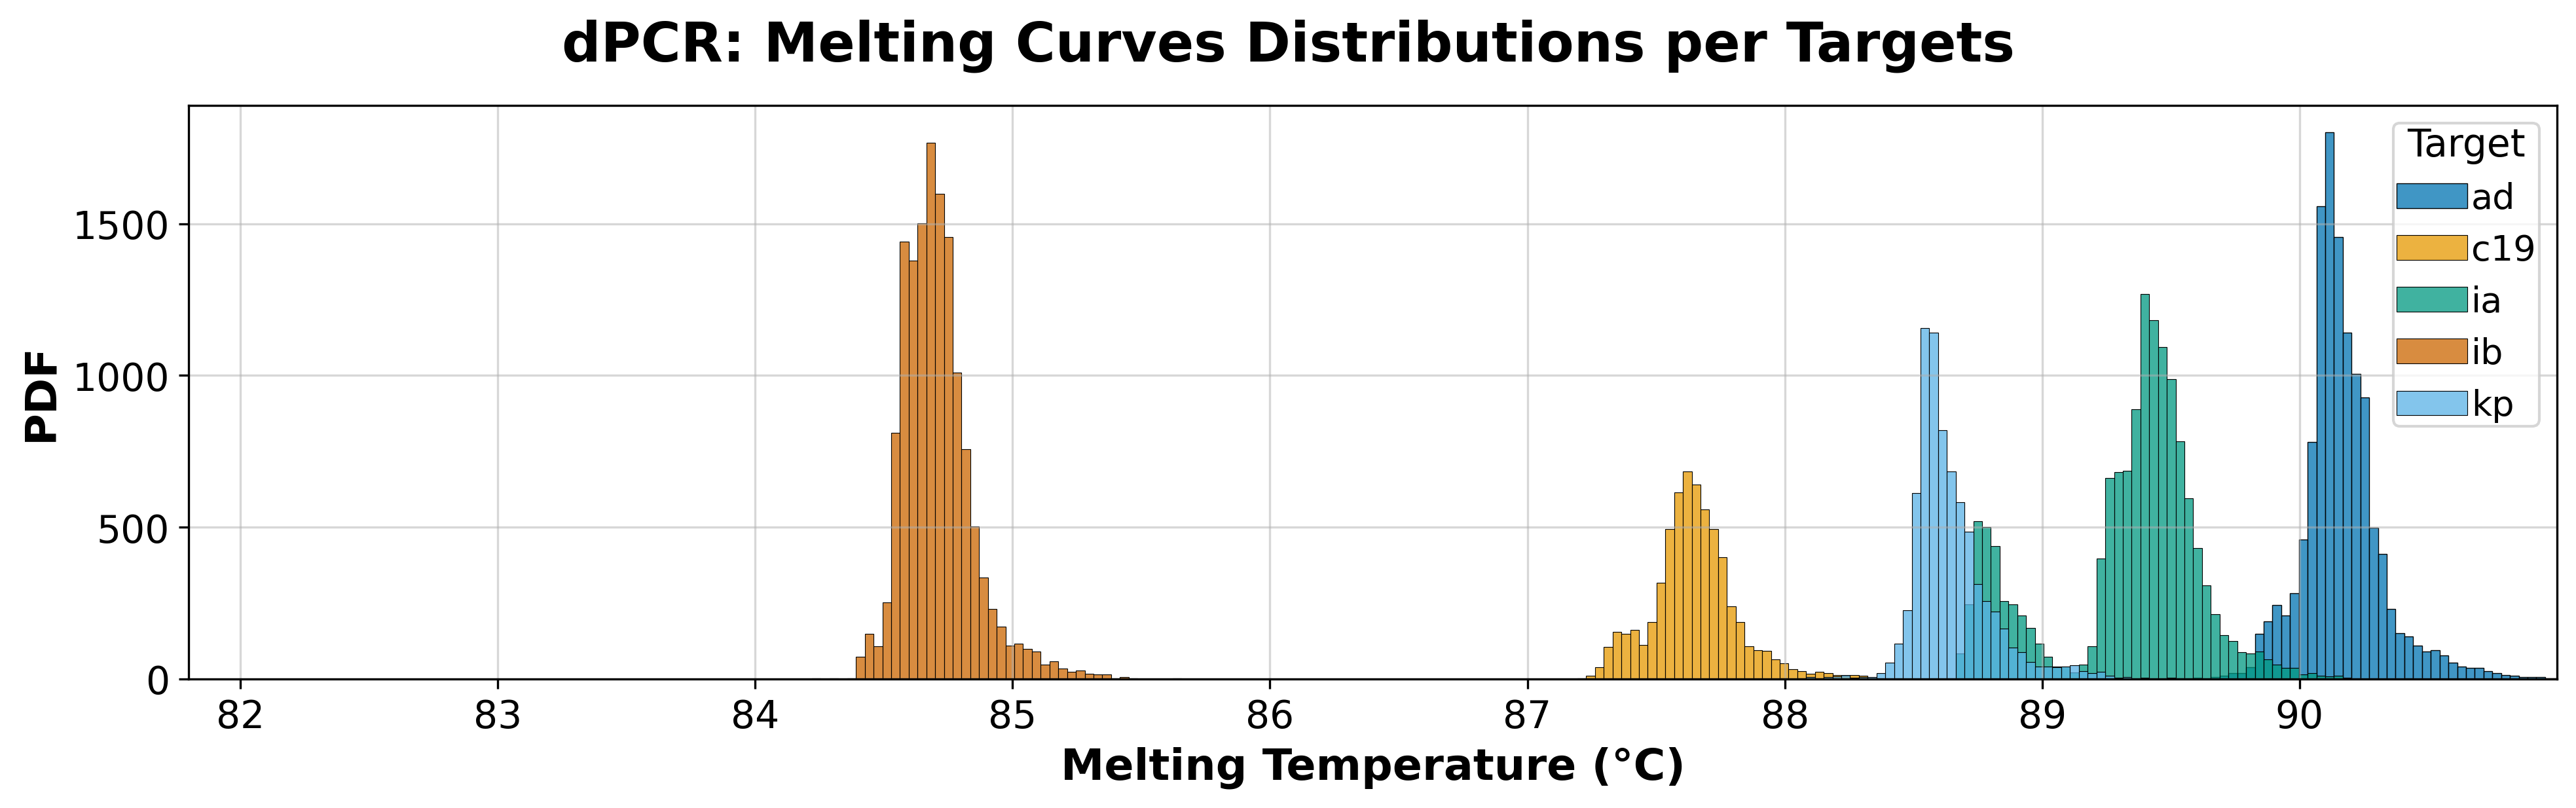

In [24]:
df_plot_MC_dist = df_plot_MC_dist.loc[df_plot_MC_dist.PrimerMix==PM]

bins = np.histogram(df_plot_MC_dist['MeltPeaks'], bins=200)[1]

fig, ax = plt.subplots(1, 1, figsize=(13, 4), dpi=300, constrained_layout=True)
fig.suptitle("dPCR: Melting Curves Distributions per Targets", fontsize=20, weight="bold")

for i, (target, df) in enumerate(df_plot_MC_dist.groupby('Target')):  
    sns.histplot(df['MeltPeaks'], bins=bins, color=f"C{i}", label=target)
    
    ax.grid(alpha=0.5)
    ax.set_xlim((81.8, 91))
    ax.set_xticks(np.arange(82, 91, 1.0))
    
    ax.set_ylabel("PDF", fontsize=16, weight="bold")
    ax.set_xlabel("Melting Temperature (" + chr(176)+ "C)", fontsize=16, weight="bold")

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14) 
    
ax.legend(title="Target", title_fontsize=14, fontsize=13, borderpad=0.1, handletextpad=0.1)
plt.show()


In [26]:
for target, df_ in df_plot_MC_dist.groupby("Target"):
    print(target, df_['MeltPeaks'].min(), df_['MeltPeaks'].median(), df_['MeltPeaks'].mean(), df_['MeltPeaks'].max())

ad 89.50051866387264 90.14240561050786 90.16194732144824 91.0564899551918
c19 87.22240237360413 87.64079583399689 87.6485129012264 88.67878183518357
ia 88.64611106108113 89.39910845093334 89.32550252144867 90.42480631014364
ib 84.22086547198157 84.69223268344199 84.70823399771655 85.6553680391285
kp 88.00588214367295 88.60842536899145 88.64582222375934 89.79321254770608


## Final Fluorescence intensity analysis visualization

/Users/lucamiglietta/opt/anaconda3/envs/MultiplexAnalysis/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lucamiglietta/opt/anaconda3/envs/MultiplexAnalysis/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lucamiglietta/opt/anaconda3/envs/MultiplexAnalysis/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future vers

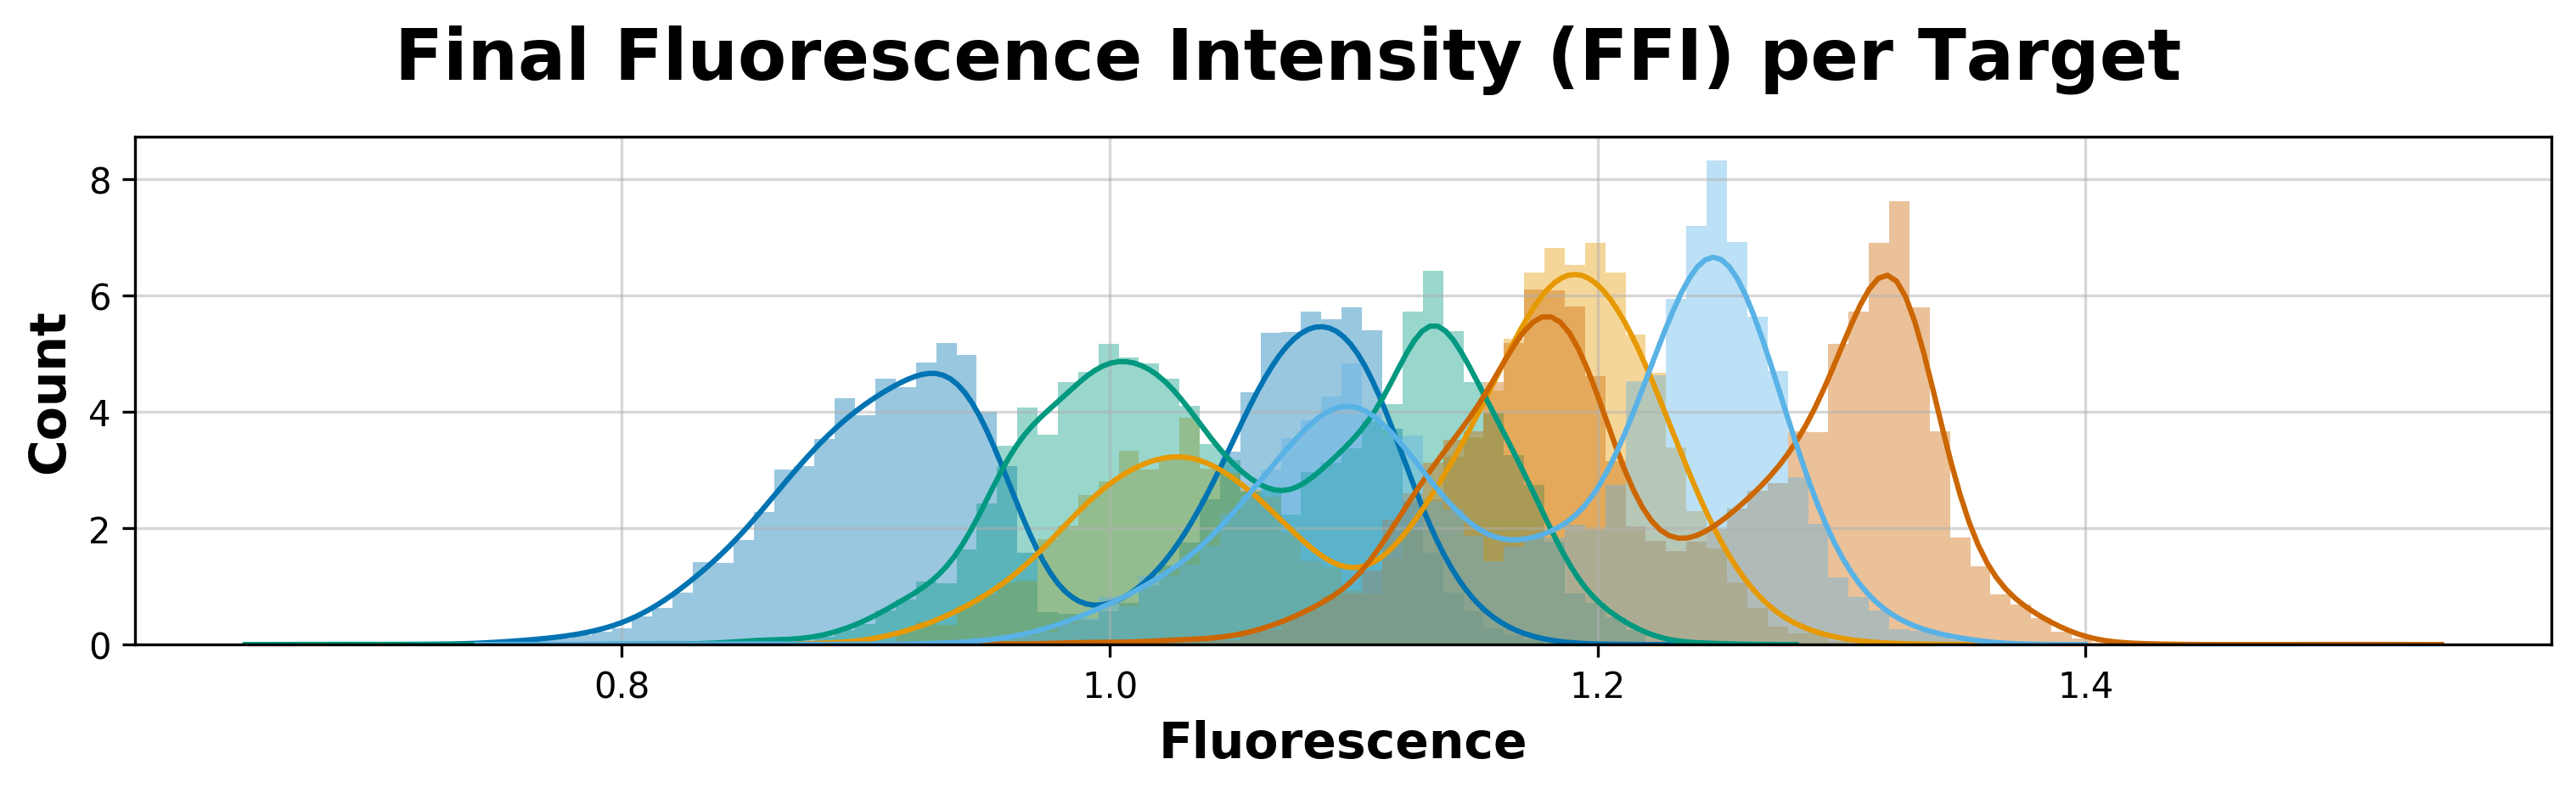

In [23]:
df_plot = df_master_no_ntc.loc[df_master_no_ntc.PrimerMix==PM]

bins = np.histogram(df_plot.iloc[:,-1], bins=100)[1]

fig, ax = plt.subplots(1, 1, figsize=(10, 3), dpi=300, constrained_layout=True)
fig.suptitle("Final Fluorescence Intensity (FFI) per Target", fontsize=20, weight="bold")

for i, (target, df) in enumerate(df_plot.groupby('Target')):  
    sns.distplot(df.iloc[:,-1], bins=bins, color=f"C{i}")
    ax.grid(alpha=0.5)
    ax.set_ylabel("Count", fontsize=14, weight="bold")
    ax.set_xlabel("Fluorescence", fontsize=14, weight="bold")

plt.show()